In [5]:
import cv2
import matplotlib.pyplot as plt

## 1.resize

In [6]:
img = cv2.imread('../image_file/demo_img/1.jpg')
img.shape   # H,W,C

(1080, 1920, 3)

### 宽高等比缩放，其中dsize参数要设置为None

In [7]:
img_resize1 = cv2.resize(img, dsize=None,fx=0.5, fy=2)
img_resize1.shape

(2160, 960, 3)

### 缩放成指定大小的宽和高

In [8]:
img_resize2 = cv2.resize(img, (100,200))  #（宽，高）
img_resize2.shape

(200, 100, 3)

## 2.crop指定区域

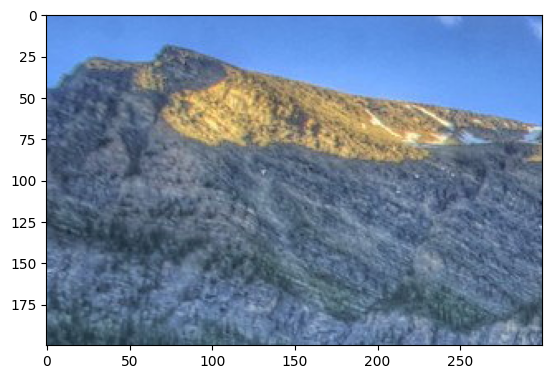

In [12]:
crop_img = img[0:200,0:300]  # [高， 宽]
plt.imshow(cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB))

## 3.从url加载图片

In [13]:
import numpy as np
import urllib.request  # 引入 urllib.request 模块

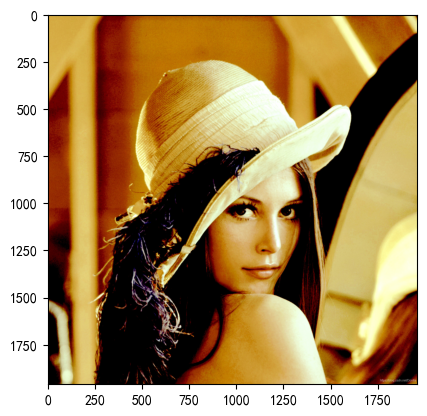

In [24]:
# 网络图片的URL
image_url = "https://img-blog.csdnimg.cn/20200113141240297.jpg?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L0RvbnRsYQ==,size_16,color_FFFFFF,t_70"

# 从URL加载图像
resp = urllib.request.urlopen(image_url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

## 4.用cv2.polylines画多边形, 按点的顺序连线

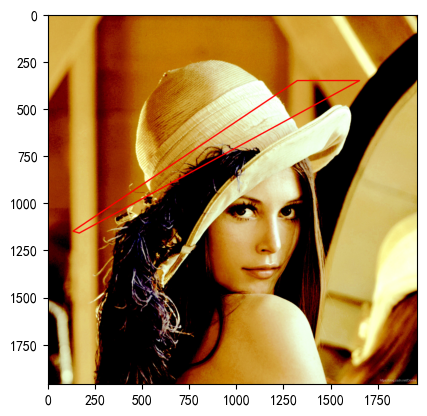

In [25]:
pts = np.array([[132, 1150], [165, 1160], [1650, 352], [1320, 352]], np.int32)

# 将三角形的顶点坐标转换为合适的维度
pts = pts.reshape((-1, 1, 2))

# 画出多边形
cv2.polylines(image, [pts], isClosed=True, color=(0, 0, 255), thickness=5)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

## 5.画一个y轴向下的坐标系

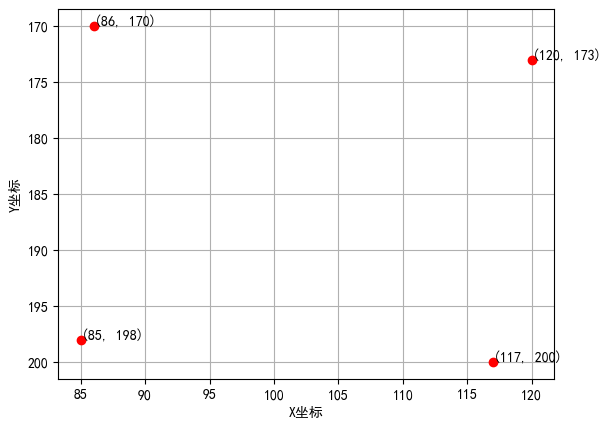

In [21]:
# 定义四个点的坐标
points = [(86, 170), (120, 173), (117, 200), (85, 198)]
# 提取x坐标和y坐标
x_coords, y_coords = zip(*points)
# 创建一个新的图形
plt.figure()
plt.gca().invert_yaxis()  # 反转y轴，让y轴向下
# 绘制四个点
plt.plot(x_coords, y_coords, 'ro')  # 'ro' 表示红色圆点
# 在每个点旁边显示坐标
for (x, y) in points:
    plt.text(x, y, f'({x}, {y})')
# 设置坐标轴标签
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.xlabel('X坐标')
plt.ylabel('Y坐标')

# 显示图形
plt.grid(True)
plt.show()

## 6.在图像上画圆

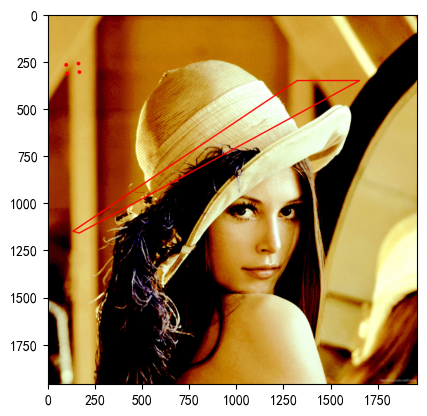

In [26]:
circle_centers = [(101, 315), (96, 269), (161, 262), (166, 307)]
radius = 10

# 在图像上绘制四个圆
for center in circle_centers:
    cv2.circle(image, center, radius, (0, 0, 255), -1)  # 参数：图像、圆心坐标、半径、颜色、厚度（-1表示填充）
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

## 7.在图像上画矩形

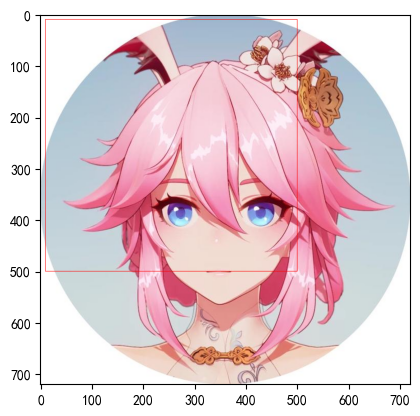

In [27]:
cv2.rectangle(img, (10,10), (500,500), (0,0,255), thickness=1)  # 左上顶点坐标， 右下顶点坐标
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))